In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("customer_churn_with_months.csv")

In [3]:
# Visão geral de informações relevantes
overview = pd.DataFrame({
    "Tipo": df.dtypes,
    "Nulos": df.isnull().sum(),
    "% Nulos": df.isnull().mean()*100,
    "Valores Únicos": df.nunique(),
    "Exemplo de Valores": df.apply(lambda x: x.unique()[:3])
})
overview

,Tipo,Nulos,% Nulos,Valores Únicos,Exemplo de Valores
ID,int64,0,0.000000,7043,"[1, 2, 4]"
Tipo de empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
Fundação da empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
Possui mais de um sócio,object,0,0.000000,2,"[Sim, Não]"
Funcionários,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
Meses de permanência,int64,0,0.000000,73,"[1, 34, 45]"
Utiliza serviços financeiros,object,0,0.000000,2,"[Não, Sim]"
PossuiContador,object,682,9.683374,2,"[nan, Não , Sim]"
Faz conciliação bancária,object,0,0.000000,3,"[automática, manual, não faz]"
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


## Dicionário de Variáveis

| Variável                                                        | Descrição                                                                                 |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **ID**                                                           | Identificador único para cada cliente.                                                   |
| **Tipo de empresa**                                              | Categoria da empresa, como MEI, ME, EPP, etc.                                            |
| **Fundação da empresa**                                          | Ano de fundação da empresa.                                                              |
| **Possui mais de um sócio**                                      | Indica se a empresa possui mais de um sócio (Sim/Não).                                   |
| **Funcionários**                                                 | Número de funcionários na empresa ou faixa categorizada.                                 |
| **mes_churn**                                                  | Indica que mês houve o churn.                                                   |
| **Meses de permanência**                                         | Quantidade de meses desde o início do contrato até maio de 2025.                         |
| **Utiliza serviços financeiros**                                 | Indica se a empresa utiliza serviços financeiros (Sim/Não).                              |
| **PossuiContador**                                               | Indica se a empresa possui contador (Sim/Não).                                           |
| **Faz conciliação bancária**                                     | Indica se a empresa realiza conciliação bancária (manual ou automática).                 |
| **Frequência: Módulo financeiro**                                | Frequência de utilização do módulo financeiro do sistema (ex: Pouco uso, Uso frequente). |
| **Frequência: Emissão de nota fiscal**                           | Frequência de utilização da emissão de nota fiscal no sistema.                           |
| **Frequência: Integração bancária**                              | Frequência de utilização da integração bancária no sistema.                              |
| **Frequência: Módulo de vendas**                                 | Frequência de utilização do módulo de vendas no sistema.                                 |
| **Frequência: Relatórios**                                       | Frequência de utilização de relatórios no sistema.                                       |
| **Frequência: APIs de integração**                               | Frequência de utilização de APIs de integração no sistema.                               |
| **Contrato**                                                     | Tipo de contrato com o cliente (ex: Mês-a-mês, Trimestral, Anual).                       |
| **Emite boletos**                                                | Indica se a empresa emite boletos (Sim/Não ou 1/0).                                       |
| **Tipo de pagamento**                                            | Método de pagamento utilizado pelo cliente.                                              |
| **Receita mensal**                                               | Receita mensal gerada pelo cliente.                                                      |
| **Receita total**                                                | Receita total acumulada pelo cliente ao longo da permanência.                            |
| **Churn**                                                        | Indica se houve churn (cancelamento) do cliente (Sim/Não).                               |

## Lidando com duplicadas

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

## Explorando os dados

In [7]:
df.head(5)

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN


In [8]:
# Removendo espaços desnecessários nos nomes das colunas, causando erros pois a coluna 6 estava "Meses de permanência ", que passa desapercebido pois não aparecia no df.head()
df.columns = df.columns.str.strip()

#### Tipo de empresa

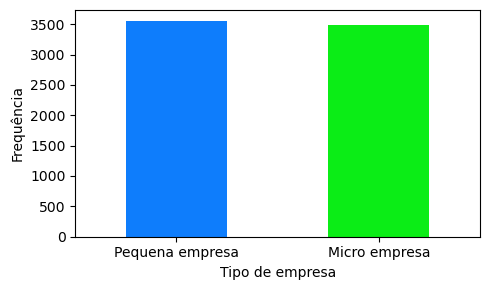

(array(['Micro empresa', 'Pequena empresa'], dtype=object),
 Tipo de empresa
 Pequena empresa    3555
 Micro empresa      3488
 Name: count, dtype: int64,
 Tipo de empresa
 Pequena empresa    50.47565
 Micro empresa      49.52435
 Name: proportion, dtype: float64)

In [9]:
#  'Tipo de Empresa'

unique = df["Tipo de empresa"].unique()
absolute_values = df["Tipo de empresa"].value_counts()
relative_values = df["Tipo de empresa"].value_counts(normalize=True)*100 # normalize=True retorna a proporção dos valores em relação ao total de linhas, multiplicar por 100 transforma a proporção em porcentagem

# Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16"])
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


unique, absolute_values, relative_values

A coluna "Tipo  de empresa" representa uma variável categórica que possue apenas dois valores distintos: "Pequena empresa" e "Micro empresa"

Não possui nenhum valor nulo ou inconsistentemente formatado.

As categorias estão distribuidas de forma muito próxima: 50.47% Pequenas empresas e 49.52% Micro Empresas.

Essas categorias podem servir para segmentar o perfil de cada uma ao relacionar com outras variáveis.

#### Fundação da Empresa

valores_unicos : [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
ano_min : 2001
ano_max : 2021
mediana : 2018.0
desvio_padrão : 4.582310729077341
top5_anos : Fundação da empresa
2016    1029
2018     990
2019     982
2021     975
2017     969
Name: count, dtype: int64


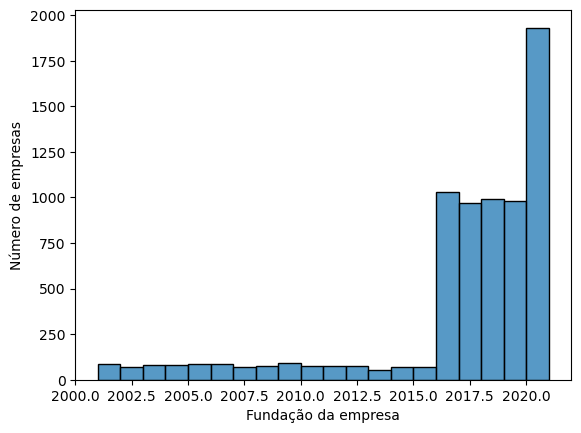

In [10]:
# 'Fundação da Empresa'

anos = df["Fundação da empresa"]

fundacao = {
    'valores_unicos' : sorted(anos.unique()),
    'ano_min' : anos.min(),
    'ano_max' : anos.max(),
    'mediana' : anos.median(),
    'desvio_padrão' : anos.std(),
    'top5_anos' : anos.value_counts().head(5)
}

for key, values in fundacao.items():
    print(f"{key} : {values}")

sns.histplot(anos, bins=20)
plt.ylabel('Número de empresas')
plt.show()


A coluna "Fundação da Empresa" registra diferentes anos que vão de 2001 até 2021. Dependendo do contexto de análise, pode ser tratada como uma variável numérica (como modelar uma relação linear com o tempo),
porém frequentemente o ano é tratado como uma variável categórica nominal, já que um ano representa todo o contexto de um período, 
o significado contextual da diferença entre 2003 e 2004 provavelmente não é a mesma de 2020 e 2021. Por isso dependendo do contexto de análise, os anos são tratados de diferentes formas.

Pode-se observar que grande parte das empresas na base de dados tem sua fundação datada de 2016 para frente.

#### Possui mais de um sócio

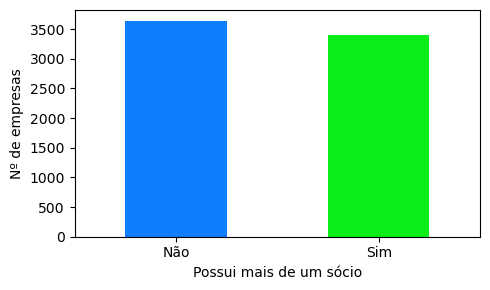

(array(['Sim', 'Não'], dtype=object),
 Possui mais de um sócio
 Não    3641
 Sim    3402
 Name: count, dtype: int64,
 Possui mais de um sócio
 Não    51.69672
 Sim    48.30328
 Name: proportion, dtype: float64)

In [11]:
# 'Possui mais de um sócio'

unique = df["Possui mais de um sócio"].unique()
absolute_values = df["Possui mais de um sócio"].value_counts()
relative_values = df["Possui mais de um sócio"].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Uma variável binária que está bem formatada com os valores "Sim" e "Não", representando se a empresa possui ou não mais de um sócio.

Embora a maioria das empresas apresenta não ter mais de um sócio, as categorias estão equilibradas (51.7% - Não, 48.3% - Sim), demonstrando que muitas das empresas possuem sim mais sócios.

Essas categorias podem segmentar empresas com possivelmente maior estrutura e geração de receita (normalmente indicado por um maior número de sócios).

#### Funcionários

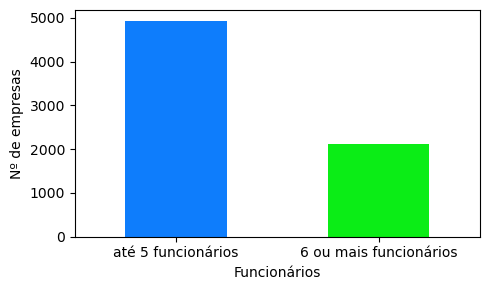

(array(['até 5 funcionários', '6 ou mais funcionários'], dtype=object),
 Funcionários
 até 5 funcionários        4933
 6 ou mais funcionários    2110
 Name: count, dtype: int64,
 Funcionários
 até 5 funcionários        70.041176
 6 ou mais funcionários    29.958824
 Name: proportion, dtype: float64)

In [12]:
# 'Funcionários'

column = 'Funcionários'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Funcionários é uma variável categórica que indica as empresas que possuem até 5 funcionários ou empresas que possuem 6 ou mais.
Os dados são consistentes e sem nulos.

Pode-se ver um desbalanceamento: 70% das empresas possuem até 5 funcionários, enquanto as 30% restantes possuem 6 ou mais funcionários.
Isso é consistente com o fato que estamos analizando uma base que possue apenas os tipos de empresa "Micro empresa" e "Pequena empresa".

É uma variável muito boa para segmentar o comportamento das empresas com uma operação maior das mais enchutas.

#### Meses de permanência

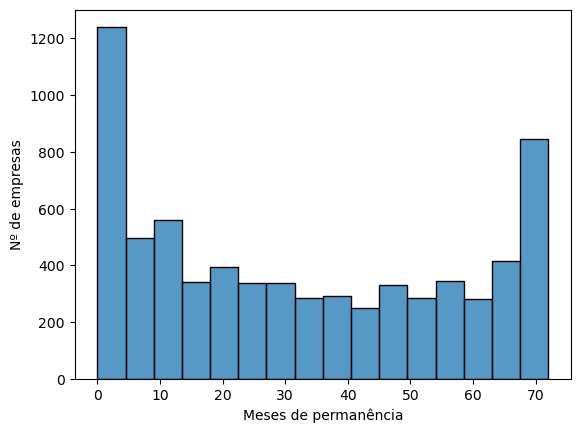

(count    7043.000000
 mean       32.371149
 std        24.559481
 min         0.000000
 25%         9.000000
 50%        29.000000
 75%        55.000000
 max        72.000000
 Name: Meses de permanência, dtype: float64,
 73,
 11)

In [13]:
# 'Meses de permanência'

column = 'Meses de permanência'

# Estatísticas descritivas
desc = df[column].describe()
# Quantidade de valores únicos
unicos = df[column].nunique()
# Quantidade de empresas com 0 meses de permanência
zeros = (df[column] == 0).sum()

sns.histplot(df[column])
plt.ylabel('Nº de empresas')
plt.show()


desc, unicos, zeros

Meses de permanência indica quantos meses cada empresa(cliente) está ativa no serviço. Dados consistentes e sem nulos.

A base possui valores de 0 a 72 meses. Empresas que possuem registro de 0 meses podem indicar um churn imediato.

Uma grande quantidade de clientes com pouco tempo: 25% das empresas estão há 9 meses no serviço. É um comportamento esperado, já que nem todos novos clientes continuam recorrentes por um longo prazo.

Já metade dos clientes estão até 2 anos e 5 meses no produto e 75% estão até 4 anos e 7 meses. Enquanto existe cliente com 6 anos de utilização dos serviços.

É uma variável muito importante para segmentar os clientes, entender comportamento de churn ou até mesmo os ciclos de vida do produto.



#### Utiliza serviços financeiros

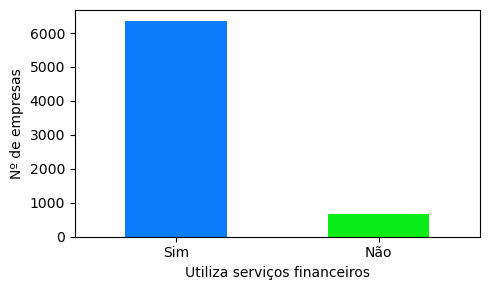

(array(['Não', 'Sim'], dtype=object),
 Utiliza serviços financeiros
 Sim    6361
 Não     682
 Name: count, dtype: int64,
 Utiliza serviços financeiros
 Sim    90.316626
 Não     9.683374
 Name: proportion, dtype: float64)

In [14]:
# 'Utiliza serviços financeiros'

column = 'Utiliza serviços financeiros'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

'Utiliza serviços financeiros' é uma variável binária que está consistentemente formatada com duas categorias: "Sim" e "Não". Sem nulos.

A distribuição está bem desbalanceada: 90.31% dos clientes utilizam os serviços financeiros, enquanto apenas 9.68% não usam.

Uma boa variável para segmentar e verificar diferença no churn das empresas que se dividem nessas categorias.

#### PossuiContador

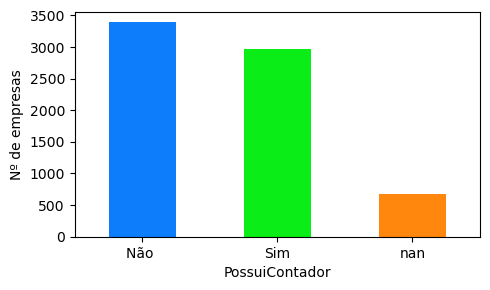

(array([nan, 'Não ', 'Sim'], dtype=object),
 PossuiContador
 Não     3390
 Sim     2971
 NaN      682
 Name: count, dtype: int64,
 PossuiContador
 Não     53.293507
 Sim     46.706493
 Name: proportion, dtype: float64,
 PossuiContador
 Não     48.132898
 Sim     42.183729
 NaN      9.683374
 Name: proportion, dtype: float64)

In [15]:
# 'PossuiContador'

column = 'PossuiContador'

unique = df[column].unique()
absolute_values = df[column].value_counts(dropna=False)
relative_values = df[column].value_counts(normalize=True)*100
relative_values_NaN = df[column].value_counts(normalize=True, dropna=False)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16","#ff870e"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values, relative_values_NaN

'PossuiContador' é uma variável categórica binária que responde se a empresa conta com o serviço de um contador. Respostas se dividem em "Sim" e "Não", porém 9,7% dos dados estão nulos.

Deve-se explorar a causa desses valores faltantes, é uma proporção bem relevante do montante total.

É uma variável muito boa para segmentação e analize, porém sempre tomando cuidado com os valores nulos.

#### Faz conciliação bancária

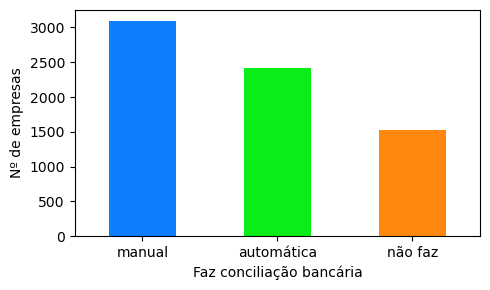

(array(['automática', 'manual', 'não faz'], dtype=object),
 Faz conciliação bancária
 manual        3096
 automática    2421
 não faz       1526
 Name: count, dtype: int64,
 Faz conciliação bancária
 manual        43.958540
 automática    34.374556
 não faz       21.666903
 Name: proportion, dtype: float64)

In [16]:
# 'Faz conciliação bancária'

column = 'Faz conciliação bancária'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16", "#ff870e"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Variável categórica que indica a forma que a empresa faz conciliação bancária, ou se não faz. As três categorias presentes são "manual", "automática" e "não faz", os dados estão consistentes e não faltantes.

A distribuição dos dados nessa categoria se dá por:

* Manual ~ 43.95%
* Automática ~ 34.37%
* Não faz ~ 21.66%

Variável utilizada para segmentação.

#### Frequência de utilização de feature do sistema: Módulo financeiro

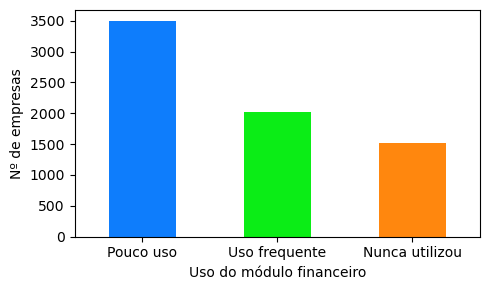

(array(['Pouco uso', 'Uso frequente', 'Nunca utilizou'], dtype=object),
 Frequência de utilização de feature do sistema: Módulo financeiro
 Pouco uso         3498
 Uso frequente     2019
 Nunca utilizou    1526
 Name: count, dtype: int64,
 Frequência de utilização de feature do sistema: Módulo financeiro
 Pouco uso         49.666335
 Uso frequente     28.666761
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [17]:
# 'Frequência de utilização de feature do sistema: Módulo financeiro'

column = 'Frequência de utilização de feature do sistema: Módulo financeiro'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16", "#ff870e"])
plt.ylabel('Nº de empresas')
plt.xlabel('Uso do módulo financeiro')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Frequência de utilização de feature do sistema: Módulo financeiro é uma variável categórica que segmenta os clientes em quem Pouco utilizou, Usou Frequentemente ou nunca utilizou o módulo financeiro.
Os dados estão formatados de forma consistente, sem nulos.

Quase 50% dos clientes fazem pouco uso dessa função, enquanto 28,7% faz uso frequente e 21.17% nunca utilizaram.

É uma boa variável para segmentação de perfil de cliente e também relacionar ao churn.

#### Frequência de utilização de feature do sistema: Emissão de nota fiscal

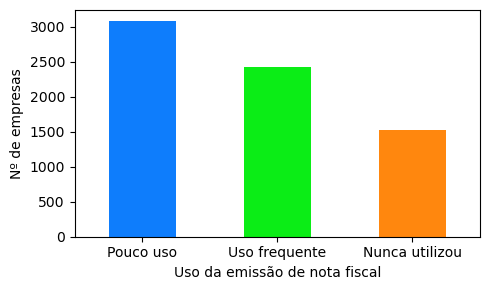

(array(['Uso frequente', 'Pouco uso', 'Nunca utilizou'], dtype=object),
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
 Pouco uso         3088
 Uso frequente     2429
 Nunca utilizou    1526
 Name: count, dtype: int64,
 Frequência de utilização de feature do sistema: Emissão de nota fiscal
 Pouco uso         43.844952
 Uso frequente     34.488144
 Nunca utilizou    21.666903
 Name: proportion, dtype: float64)

In [18]:
# 'Frequência de utilização de feature do sistema: Emissão de nota fiscal'

column = 'Frequência de utilização de feature do sistema: Emissão de nota fiscal'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16", "#ff870e"])
plt.ylabel('Nº de empresas')
plt.xlabel('Uso da emissão de nota fiscal')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Frequência de utilização de feature do sistema: Módulo Emissão de nota fiscal é uma variável categórica que segmenta os clientes em quem Pouco utilizou, Usou Frequentemente ou nunca utilizou o módulo de Emissão de nota fiscal.

Aproximadamente 43.85% dos clientes fazem pouco uso dessa função, enquanto 34.4% faz uso frequente e 21.17% nunca utilizaram.

É uma boa variável para segmentação de perfil de cliente e também relacionar ao churn.

#### Variáveis de frequência restantes

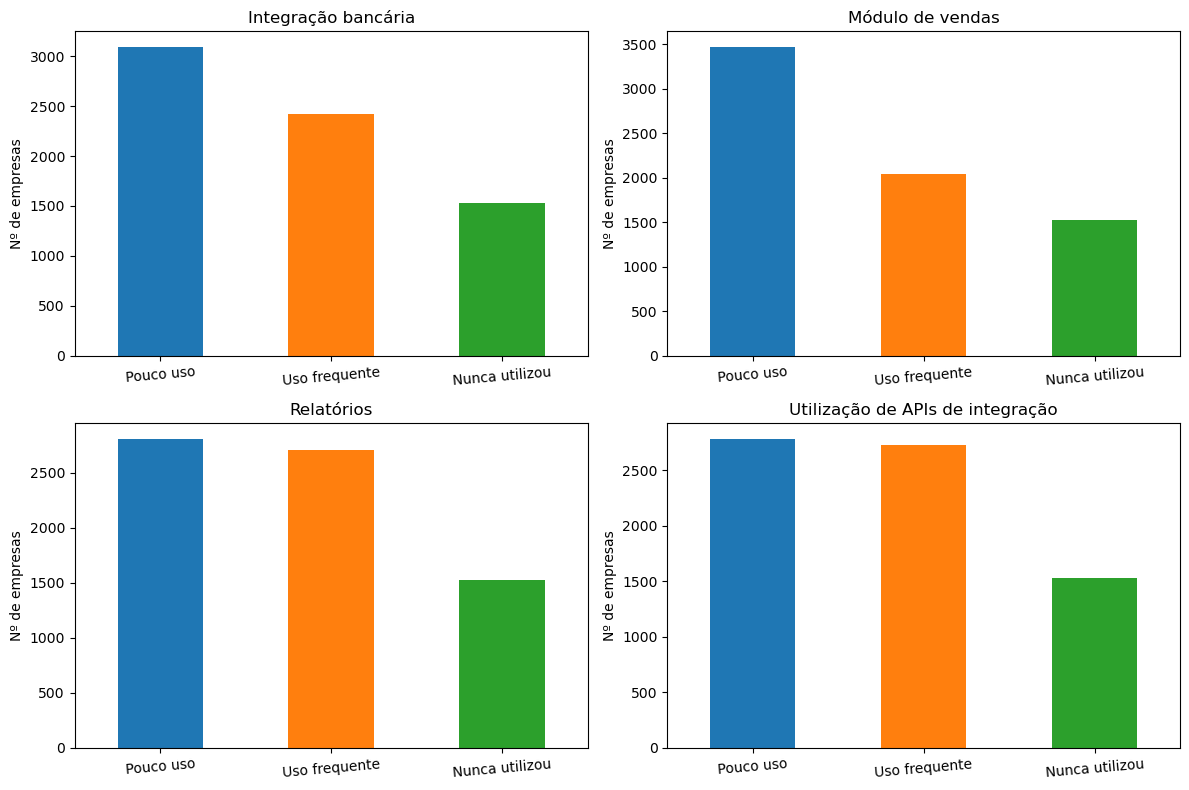

({'Frequência de utilização de feature do sistema: Integração bancária': Frequência de utilização de feature do sistema: Integração bancária
  Pouco uso         3095
  Uso frequente     2422
  Nunca utilizou    1526
  Name: count, dtype: int64,
  'Frequência de utilização de feature do sistema: Módulo de vendas': Frequência de utilização de feature do sistema: Módulo de vendas
  Pouco uso         3473
  Uso frequente     2044
  Nunca utilizou    1526
  Name: count, dtype: int64,
  'Frequência de utilização de feature do sistema: Relatórios': Frequência de utilização de feature do sistema: Relatórios
  Pouco uso         2810
  Uso frequente     2707
  Nunca utilizou    1526
  Name: count, dtype: int64,
  'Frequência de utilização de feature do sistema: Utilização de APIs de integração': Frequência de utilização de feature do sistema: Utilização de APIs de integração
  Pouco uso         2785
  Uso frequente     2732
  Nunca utilizou    1526
  Name: count, dtype: int64},
 {'Frequência de 

In [19]:
freq_columns = [
    'Frequência de utilização de feature do sistema: Integração bancária',
    'Frequência de utilização de feature do sistema: Módulo de vendas',
    'Frequência de utilização de feature do sistema: Relatórios',
    'Frequência de utilização de feature do sistema: Utilização de APIs de integração'
]


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(freq_columns):
    abs_freq = df[col].value_counts()
    ax = axs[i//2, i%2]
    abs_freq.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], ax=ax)
    ax.set_title(col.replace('Frequência de utilização de feature do sistema: ', ''))
    ax.set_ylabel('Nº de empresas')
    ax.set_xlabel('')
    ax.set_xticklabels(abs_freq.index, rotation=5)
plt.tight_layout()
plt.show()

numbers_absolute = {col: df[col].value_counts() for col in freq_columns}
numbers_relative = {col: df[col].value_counts(normalize=True)*100 for col in freq_columns}

numbers_absolute,numbers_relative


Restante das variáveis de frequência de utilização de ferramentas: 

Mesmas categorias - Pouco uso, Uso Frequente, Nunca utilizou. Tudo formatado de forma consistente e sem nulos.

- Algumas ferramentas possuem distribuições discrepante em relação ao pouco uso e uso frequente. Exemplo: Módulo de vendas é Pouco usado por 49.3% dos usuários enquanto tem um uso frequente por 29% deles.
- Já outras features tem uma distribuição mais próxima uma da outra. Exemplo: Feature de relatórios é Pouco usado por 39.5% dos usuários enquanto 38.8% utiliza frequentemente.
- Todas as features possuem os mesmos 1526 clientes que nunca utilizaram a respectiva função, que representam aproximadamente 21.67% dos usuários.

São variáveis muito boas para segmentação dos clientes. A diferença da distribuição da frequência de utilização de algumas features potencialmente indicam perfis diferentes de usuários.



#### Contrato

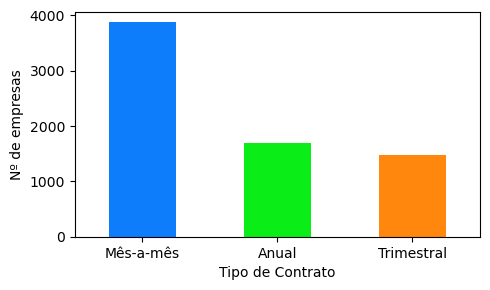

(array(['Mês-a-mês', 'Trimestral', 'Anual'], dtype=object),
 Contrato
 Mês-a-mês     3875
 Anual         1695
 Trimestral    1473
 Name: count, dtype: int64,
 Contrato
 Mês-a-mês     55.019168
 Anual         24.066449
 Trimestral    20.914383
 Name: proportion, dtype: float64)

In [20]:
# 'Contrato'

column = 'Contrato'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16", "#ff870e"])
plt.ylabel('Nº de empresas')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Contrato é uma variável categórica que possui três possíveis valores: Mês-a-mês, Anual e Trimestral. Estão bem formatados de forma uniforme e sem nulos.

- 55.01% dos clientes possuem contrato mensal
- 24.06% possuem contrato anual
- 20.91% Possuem contrato trimestral

Variável importante para encontrar diferenças no padrão de churn conforme os contratos adotados pelos clientes, por exemplo.

#### Emite boletos

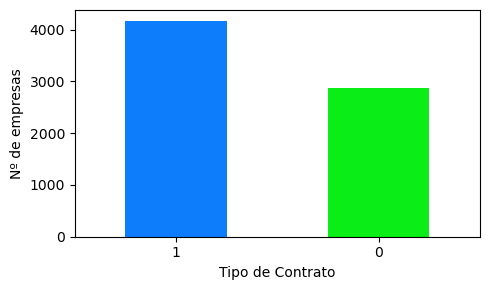

(array([1, 0], dtype=int64),
 Emite boletos
 1    4171
 0    2872
 Name: count, dtype: int64,
 Emite boletos
 1    59.221922
 0    40.778078
 Name: proportion, dtype: float64,
 0)

In [21]:
# 'Emite Boletos'

column = 'Emite boletos'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16", "#ff870e"])
plt.ylabel('Nº de empresas')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Comparar se são equivalentes (depois de mapear Yes/No para 1/0)
col_bin = df['Emite boletos']
col_txt = df['Emite boletos.1'].map({'Yes': 1, 'No': 0})

diferentes = (col_bin != col_txt).sum()

unique, absolute_values, relative_values, diferentes

Emite boletos e Emite Boletos.1 indicam a mesma coisa. Se os usuários emitem ou não boletos. A diferença é que 'Emite boletos' está utilizando valores binários '1' e '0', enquanto 'Emite boletos.1' utiliza 'Yes' or 'No.

Ambos bem formatados e sem nulos. 

Não há inconsistência entre um e outro: todos '1' se relacionam com um 'Yes' enquanto todos '0' se relacionam com um 'No'. Por isso se pode escolher qualquer uma das opções.
A opção binária é preferencialmente utilizada para modelagem e análise quantitativa.

É uma variável importante para segmentar os usuários e verificar relação com o churn.

#### Tipo de pagamento

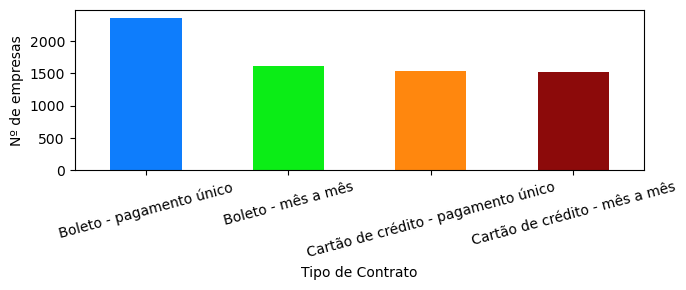

In [22]:
# 'Tipo de pagamento'


column = 'Tipo de pagamento'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(7,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16", "#ff870e", "#8c0a0a"])
plt.ylabel('Nº de empresas')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Tipo de pagamento possui os seguintes valores: 
- Boleto - pagamento único
- Boleto - mês a mês
- Cartão de crédito - pagamento único
- Cartão de crédito - mês a mês

Os valores são formatados de forma consistente sem erros. Não há casos de nulos.

Variável que pode ser utilizada para procurar relação entre o método de pagamento adotado com o padrão de churn.

#### Receita mensal

(count    7043.000000
 mean       64.761692
 std        30.090047
 min        18.250000
 25%        35.500000
 50%        70.350000
 75%        89.850000
 max       118.750000
 Name: Receita mensal, dtype: float64,
 0)

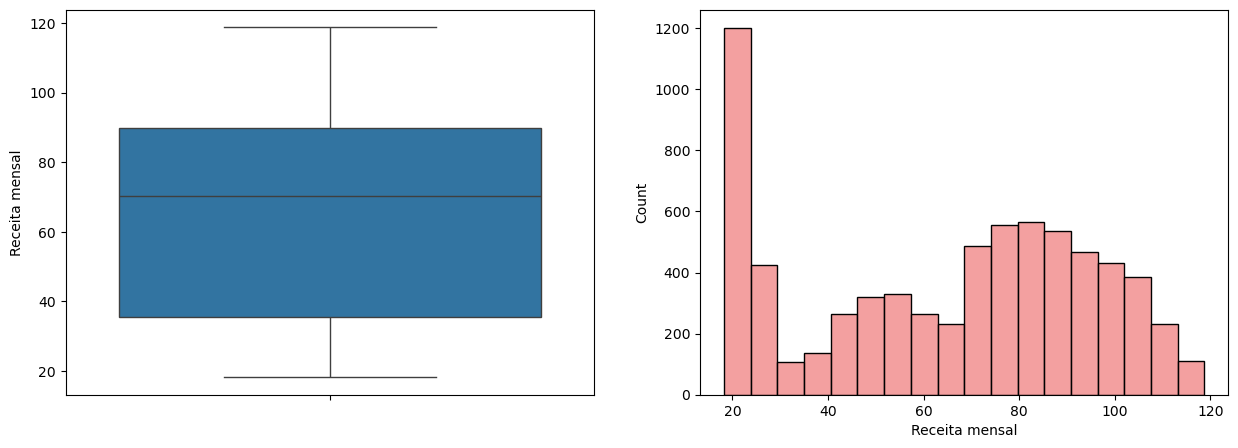

In [23]:
# 'Receita mensal'

column = 'Receita mensal'

desc = df[column].describe()

n_null = df[column].isnull().sum()


fig, (ax_box, ax_hist) = plt.subplots(
    nrows=1,           # 2 rows
    ncols=2,           # 1 column
    figsize=(15, 5),   # Figure size
)

sns.boxplot(df[column], ax=ax_box)
sns.histplot(df[column], ax=ax_hist, color='lightcoral')


desc, n_null

Receita mensal é uma variável numérica que representa o montante pago pelo cliente mensalmente. Não há valores faltantes.

As principais estatísticas descritivas são:
- Média: R$ 64,76
- Desvio Padrão: R$ 30,09
- Mediana: R$ 70,35
- Valor mínimo: R$ 18,25
- Valor máximo: R$ 118,75

Não existem valores extremamente fora do esperado. 

É uma variável importante para investigar o engajamento financeiro dos clientes, lifetime value, churn e análise do ticket médio.

#### Receita total

(count    7032.000000
 mean     2283.300441
 std      2266.771362
 min        18.800000
 25%       401.450000
 50%      1397.475000
 75%      3794.737500
 max      8684.800000
 Name: Receita total, dtype: float64,
 11)

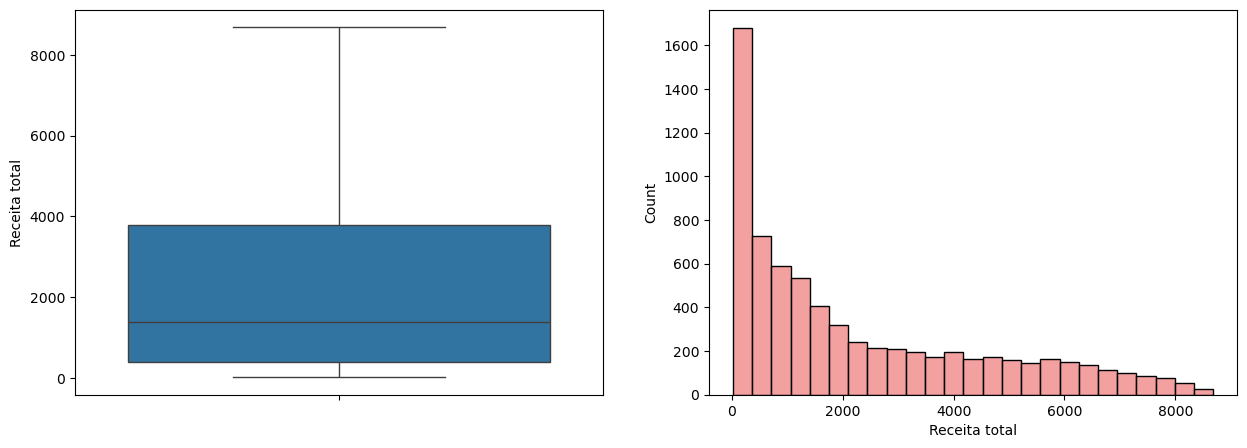

In [24]:
# 'Receita total'

column = 'Receita total'

desc = df[column].describe()

n_null = df[column].isnull().sum()


fig, (ax_box, ax_hist) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(15, 5),
)

sns.boxplot(df[column], ax=ax_box)
sns.histplot(df[column], ax=ax_hist, color='lightcoral')


desc, n_null

Receita total é uma variável numérica que quantifica os valores gastos por um cliente desde o inicío do contrato. Os dados apresentam 11 valores nulos, representando apenas 0,16% da base. Vale a pena investigar se existe uma relação para esses valores faltantes, mesmo que o impacto por serem poucos seja mínimo.

As principais estatísticas descritivas são:
- Média: R$2283,30
- Desvio Padrão: R$2266.77
- Mediana: R$1397,47
- Valor Mínimo: R$18,80
- Valor Máximo: R$8684,8

Pode-se perceber uma grande assimetria nos dados. Muitos clientes com receita total baixa e poucos clientes com receita total muito maior. A dispersão dos dados é bem elevada também, com o desvio padrão bem próximo da média dos valores.

Apesar dos poucos valores nulos, o restante dos dados estão bem formatados e sem inconsistências.

Boa variável para análise do lifetime value, segmentar os clientes e explorar a relação com o churn.

#### Churn

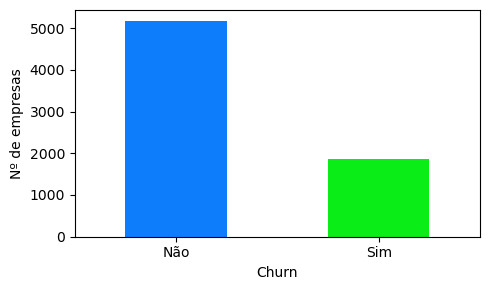

(array(['Não', 'Sim'], dtype=object),
 Churn
 Não    5174
 Sim    1869
 Name: count, dtype: int64,
 Churn
 Não    73.463013
 Sim    26.536987
 Name: proportion, dtype: float64)

In [25]:
# 'Churn'

column = 'Churn'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values

Churn é uma variável binária que possui os valores "Sim" e "Não", consistentemente formatados e indicam se o cliente já cancelou o serviço ou não.

Os dados apontam que 1869 clientes (~26.54%) já cancelaram o serviço. Enquanto 5174 (~73.46%) continuam com a assinatura.

Variável principal para análises de retenção.

#### mes_churn

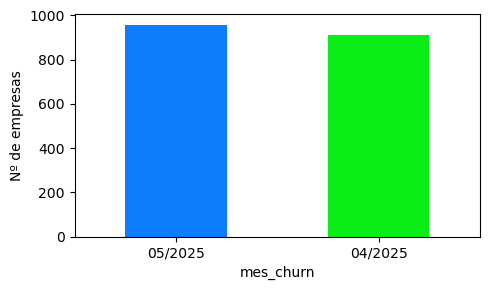

(array([nan, '04/2025', '05/2025'], dtype=object),
 mes_churn
 05/2025    958
 04/2025    911
 Name: count, dtype: int64,
 mes_churn
 05/2025    51.257357
 04/2025    48.742643
 Name: proportion, dtype: float64,
 mes_churn
 NaN        73.463013
 05/2025    13.602158
 04/2025    12.934829
 Name: proportion, dtype: float64)

In [26]:
# 'mes_churn'

column = 'mes_churn'

unique = df[column].unique()
absolute_values = df[column].value_counts()
relative_values = df[column].value_counts(normalize=True)*100
relative_values_NaN = df[column].value_counts(normalize=True, dropna=False)*100

#Gráfico
plt.figure(figsize=(5,3))
absolute_values.plot(kind='bar', color=["#0e7dfc","#0bed16","#ff870e"])
plt.ylabel('Nº de empresas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

unique, absolute_values, relative_values, relative_values_NaN

mes_churn é uma variável categórica que indica o mês que foi feito o cancelamento do serviço. Como depende do cliente ter o churn positivo, todas entradas que não tiveram churn possuem "mes_churn" com um valor nulo.

Distribuição dos dados:
- NaN - 73.46% , são os clientes que não cometeram churn, ou seja, ainda ativos
- 05/2025 - 13.6%
- 04/2025 - 12.93%

Os dados estão bem formatados sem inconsistências.

Como os dados possuem apenas dois meses, imagina-se que a base de dados foi construida ou filtrada para analizar esse período específico.

## Análise bivariada

#### Churn X Tipo de empresa

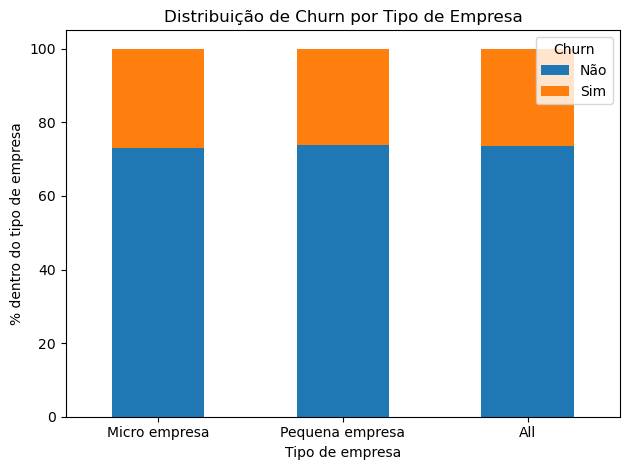

Churn,Não,Sim
Tipo de empresa,,
Micro empresa,73.079128,26.920872
Pequena empresa,73.839662,26.160338
All,73.463013,26.536987


In [27]:
column = 'Tipo de empresa'

crosstab = pd.crosstab(df[column], df['Churn'], margins=True, normalize='index') * 100

crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Distribuição de Churn por Tipo de Empresa')
plt.ylabel('% dentro do tipo de empresa')
plt.xlabel('Tipo de empresa')
plt.legend(title='Churn', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

crosstab

Tanto as pequenas quanto micro empresas parecem ter uma proporção de churn muito parecida.

Micro empresas:
- 73.08% dos clientes continuaram no serviço
- 26.92% dos clientes não prosseguiram com o serviço

Pequenas empresas:
- 73.84% dos clientes continuram no serviço
- 26.16% dos clientes não prosseguiram com o serviço

Não é possível afirmar que o tipo de empresa de forma isolada seja um fator determinante para prever o churn.


#### Churn X Funcionários

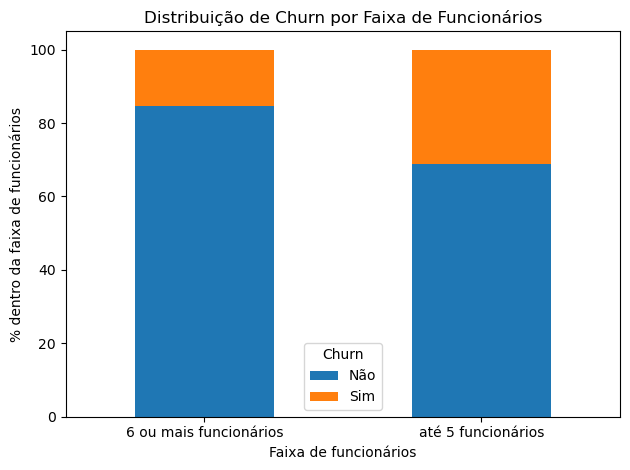

Churn,Não,Sim
Funcionários,,
6 ou mais funcionários,84.549763,15.450237
até 5 funcionários,68.720860,31.279140


In [28]:
column = 'Funcionários'

crosstab = pd.crosstab(df[column], df['Churn'], normalize='index') * 100
crosstab = crosstab[['Não', 'Sim']]

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Distribuição de Churn por Faixa de Funcionários')
plt.ylabel('% dentro da faixa de funcionários')
plt.xlabel('Faixa de funcionários')
plt.legend(title='Churn', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

crosstab

Empresas que tem menos funcionários possuem uma taxa um pouco maior de não prosseguir com o serviço.

Algum fator que afeta esse grupo de empresas mais enxutas pode acontecer. Seja por parte do produto ou por oscilações do mercado.

#### Churn X Uso do Módulo financeiro

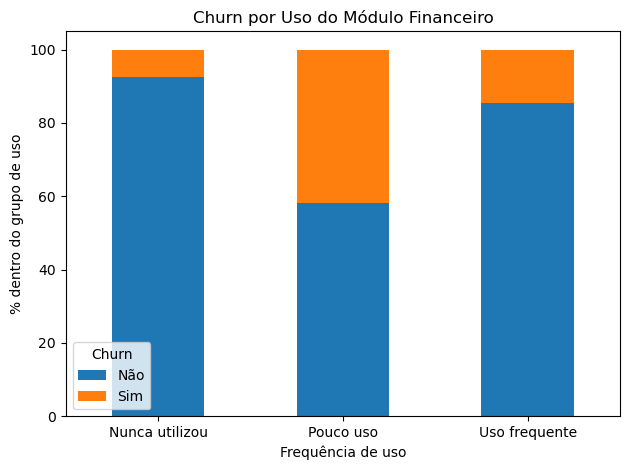

Churn,Não,Sim
Frequência de utilização de feature do sistema: Módulo financeiro,,
Nunca utilizou,92.595020,7.404980
Pouco uso,58.233276,41.766724
Uso frequente,85.388806,14.611194


In [29]:
column = 'Frequência de utilização de feature do sistema: Módulo financeiro'
crosstab = pd.crosstab(df[column], df['Churn'], normalize='index') * 100


crosstab = crosstab[['Não', 'Sim']] 

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Churn por Uso do Módulo Financeiro')
plt.ylabel('% dentro do grupo de uso')
plt.xlabel('Frequência de uso')
plt.legend(title='Churn', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

crosstab

- Apenas 7.4% de quem nunca utilizou o módulo financeiro sofreu churn. Como temos apenas o recorte dos dois últimos meses, e maioria dos clientes assina mensalmente, é possível que o grupo que nunca utilizou o módulo financeiro tenha uma quantidade grande de clientes novos, que ainda não engajaram com a ferramenta e não descontinuaram a assinatura.
- ~41.77% dos clientes que fazem pouco uso do Módulo financeiro sofreram churn. Em comparação com apenas 14.61% dos clientes que fazem uso frequente desse mesmo módulo.

A diferença de engajamento dos clientes com essa ferramenta indica um forte indício da possibilidade de churn.

#### Churn X Tipo de Contrato

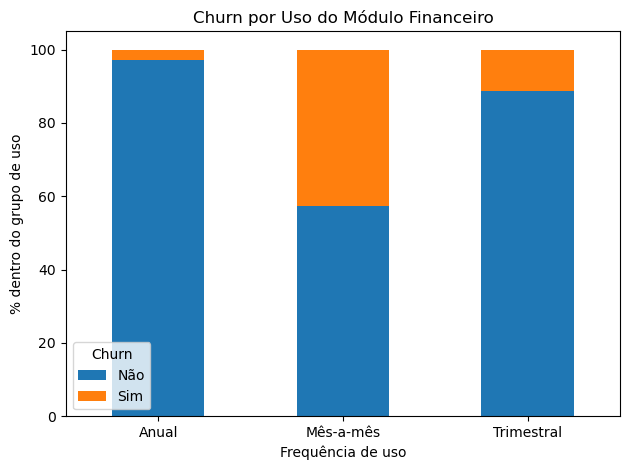

Churn,Não,Sim
Contrato,,
Anual,97.168142,2.831858
Mês-a-mês,57.290323,42.709677
Trimestral,88.730482,11.269518


In [30]:
column = 'Contrato'
crosstab = pd.crosstab(df[column], df['Churn'], normalize='index') * 100


crosstab = crosstab[['Não', 'Sim']] 

ax = crosstab.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Churn por Uso do Módulo Financeiro')
plt.ylabel('% dentro do grupo de uso')
plt.xlabel('Frequência de uso')
plt.legend(title='Churn', loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

crosstab

O tipo de contrato onde os clientes pagam mês-a-mês é o que tem maior taxa de churn (42.7%), já os de plano trimestrais 11.27% e anual 2.83%.

Bom relembrar que possivelmente os dados foram filtrados ou a base foi montada com o churn de apenas os meses mais recentes de abril e maio de 2025.

Logo, uma das explicações para essa grande diferença, simplesmente pode ser porque dentro desse período poucos clientes que assinaram o anual possuiam o pagamento expirado nesses 2 meses. O mais prudente seria observar quantos dos contratos anuais acabavam nestes meses, e a partir disso ver a proporção de quantos deixaram de assinar o serviço ou continuaram.

O mesmo valeria para o trimestral, que já tem uma taxa de churn maior que o anual. Uma melhor investigação com a informação das datas do fim dos contratos anuais/trimestrais poderia ajudar a melhor indicar que contratos maiores devam ser incentivados. De qualquer forma, já é uma boa ideia o incentivo de contratos longos, pois minimiza o churn em curto e médio prazo.

#### Churn X Receita Mensal

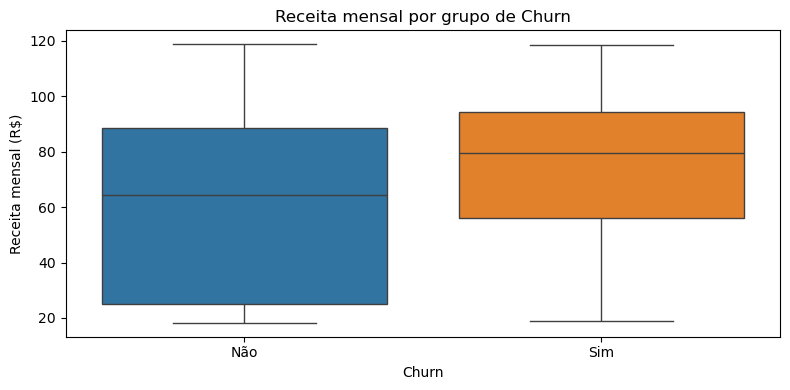

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn',
            y='Receita mensal',
            hue='Churn',
            data=df,
            palette=['#1f77b4', '#ff7f0e'])
plt.title('Receita mensal por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita mensal (R$)')
plt.tight_layout()
plt.show()

# Estatísticas de resumo por grupo
grouped = df.groupby('Churn')['Receita mensal'].describe()
grouped

Os gráficos indicam a possibilidade dos clientes de ticket médio maior tendem a cometer churn.

#### Churn X Receita total

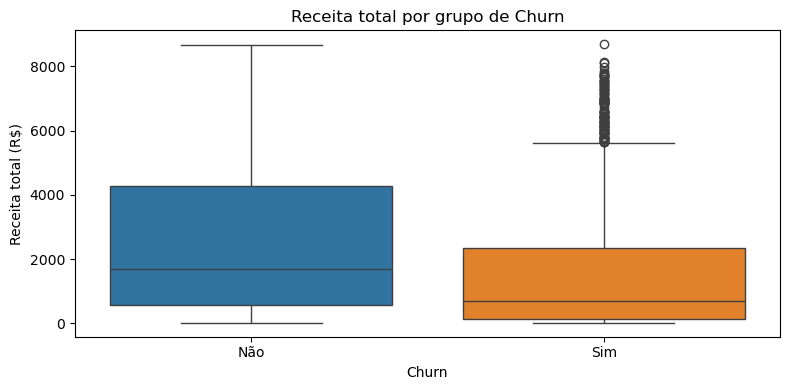

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
Não,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
Sim,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', 
            y='Receita total',
            hue='Churn',
            data=df,
            palette=['#1f77b4', '#ff7f0e'])
plt.title('Receita total por grupo de Churn')
plt.xlabel('Churn')
plt.ylabel('Receita total (R$)')
plt.tight_layout()
plt.show()

# Estatísticas descritivas por grupo
grouped_total = df.groupby('Churn')['Receita total'].describe()
grouped_total

Clientes que tem maior receita total tendem a continuar no serviço. Indicando que é interessante investir no aumento do lifetime value.

Como o maior ticket médio tende a correlacionar com churn e a receita total indica maior retenção, pode-se entender que quanto mais tempo os clientes estão assinando o serviço, maior a chance de continuarem. Pois a principal forma de maximizar a receita total é através do tempo.

#### Correlação entre variáveis

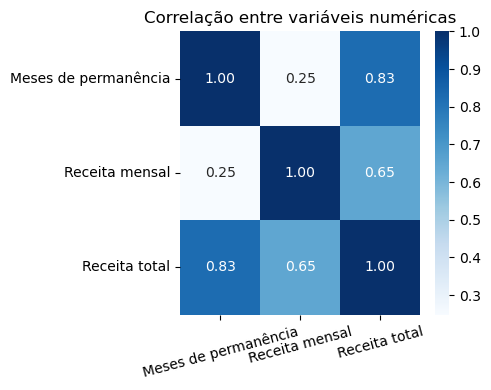

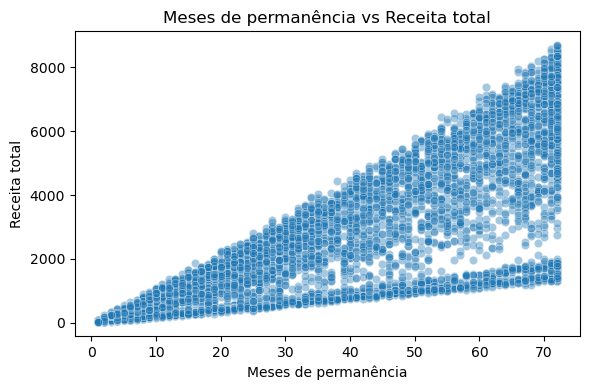

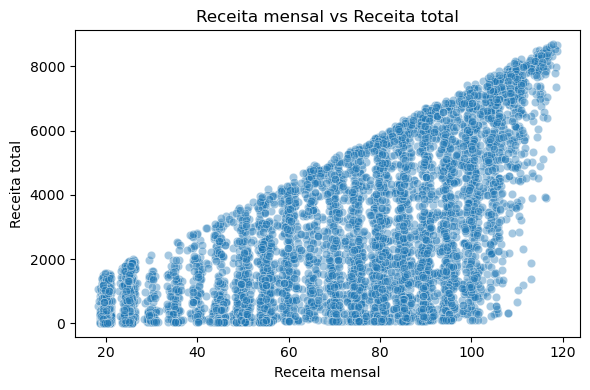

,Meses de permanência,Receita mensal,Receita total
Meses de permanência,1.00000,0.247900,0.825880
Receita mensal,0.24790,1.000000,0.651065
Receita total,0.82588,0.651065,1.000000


In [33]:
num_vars = ['Meses de permanência', 'Receita mensal', 'Receita total']
corr_matrix = df[num_vars].corr()

# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Scatter plot: Meses de permanência vs Receita total
plt.figure(figsize=(6,4))
sns.scatterplot(x='Meses de permanência', y='Receita total', data=df, alpha=0.4)
plt.title('Meses de permanência vs Receita total')
plt.tight_layout()
plt.show()

# Scatter plot: Receita mensal vs Receita total
plt.figure(figsize=(6,4))
sns.scatterplot(x='Receita mensal', y='Receita total', data=df, alpha=0.4)
plt.title('Receita mensal vs Receita total')
plt.tight_layout()
plt.show()

corr_matrix


Podemos ver que os clientes com maior ticket médio possuem uma alta correlação (0.65) com a receita total. Porém os meses de permanência possuem uma correlação maior ainda (0.825).

Já não há evidências de uma correlação forte que indique que empresas que utilizam de planos mais caros são retidas por mais tempo.

## Conclusão

- Clientes que pouco usam ferramentas importantes do serviço, indicando baixo engajamento, possuem maior risco de churn.
- Os contratos de longo prazo podem garantir uma proteção da retenção de clientes no curto/médio prazo.
- Os clientes que acumularam maior receita total potencialmente são os que se mantiveram por mais tempo, mostrando que a retenção é prioridade.

Recomendações:
- Buscar mudanças recentes no produto ou mercado que podem ter influenciado um churn recente
- Promover o uso de módulos importantes do produto, que façam com que os clientes engagem e se mantenham por mais tempo no serviço
- Acompanhar os clientes que possuem perfil com maior probabilidade de churn.
- Incentivar contratos de maior duração

Para manter uma maior retenção de clientes talvez seja necessário fazer ações para o aumento de engajamento do produto, buscando contratos mais longos. Assim os clientes tendem a se manter no serviço por mais tempo.